In [1]:
import numpy as np
import random
from random import randint
import time
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
global n,d
n = 9635 #10000#39861#1500
d = 2225#102660#12419

In [3]:
def searchtime(matrix,flag):
    nearestneighbours = []
    start = time.time()
    for i in range(matrix.shape[0]):
        if(flag == True):
            js = getcosinesimilarity(matrix[i], matrix[15])
        else:
            js = getinteger(matrix[i], matrix[15])
                
       # if(js >= 0.8):
       #     nearestneighbours.append(i)
    end = time.time()
    search = end-start
    print(search)
    return search

In [4]:
def readdataset():
    dataset = np.loadtxt("../dataset/bbc.txt", dtype=int, usecols =(0,1), skiprows=3)    
    matrix = np.zeros([n,d])
    print (dataset.shape)
    total = dataset.shape[0]
    i=0
    while(1):
    #for i in range(n):
        if i==total:
            break
        x = dataset[i][0]
        y = dataset[i][1]
        #print(x)
        if x>=n+1:
            break
        matrix[x-1][y-1] = 1
        i+=1
    print(i)
    return matrix

In [5]:
def convertocompact(matrix):
    compact = []
    for i in range(matrix.shape[0]):
        current = []
        for j in range(matrix.shape[1]):
            if(matrix[i][j]==1):
                current.append(j)
        compact.append(current)
    return compact

In [6]:
def getcosinesimilarity(a, b):
    hammingdistance = np.count_nonzero(a!=b)
    cs = np.cos((np.pi/len(a))*hammingdistance) # length of a and b is equal
    return cs

In [7]:
def getinteger(a, b):
    innerproduct = np.inner(a,b)
    a1 = np.count_nonzero(a)
    b1 = np.count_nonzero(b)
    if a1==0 or b1==0:
        cs=1
    else:
        cs = innerproduct/(np.sqrt(a1)*np.sqrt(b1))
    return cs

In [8]:
def ourtransform(reduceddim, matrix, n, d):
    start = time.time()
    sigmatrix = np.zeros([n,reduceddim])
    for i in range (reduceddim):
        rv = np.random.choice([1,-1], size=d, p=[0.5,0.5])
        for j in range(n):
            vector = matrix[j]
            ip = 0
            for k in vector:
                ip += rv[k]
            if(ip>0):
                sigmatrix[j][i] = 1
    end = time.time()
    totaltime = end - start
    print(totaltime)
    timeforour.append(totaltime)
    return sigmatrix

In [9]:
def getpairsets(matrix, num ,flag):
    set01 = set([])
    set02 = set([])
    set03 = set([])
    set04 = set([])
    set05 = set([])
    set06 = set([])
    set07 = set([])
    set08 = set([])
    set09 = set([])
    
    vector = matrix[num]
    j = num
    for i in range(963,9635):
        if(flag==True):
            hdistance = getcosinesimilarity(vector, matrix[i])
            #print(hdistance)
        else:
            hdistance = getinteger(vector, matrix[i])

            
        if(hdistance >= 0.9):
            set09.add((i,j))
        if(hdistance >= 0.8):
            set08.add((i,j))
        if(hdistance >= 0.7):
            set07.add((i,j))
        if(hdistance >= 0.6):
            set06.add((i,j))
        if(hdistance >= 0.5):
            set05.add((i,j))
        if(hdistance >= 0.4):
            set04.add((i,j))
        if(hdistance >= 0.3):
            set03.add((i,j))
        if(hdistance >= 0.2):
            set02.add((i,j))
        if(hdistance >= 0.1):
            set01.add((i,j))
            #print("inset1")
    return set01,set02,set03,set04,set05,set06,set07,set08,set09
    

In [10]:
def calculateaccuracy(vec, matrix, compressedmatrix, flag):
    
    accuracy = []
    
    oset1,oset2,oset3,oset4,oset5,oset6,oset7,oset8,oset9 = getpairsets(matrix, vec, False)
    cset1,cset2,cset3,cset4,cset5,cset6,cset7,cset8,cset9 = getpairsets(compressedmatrix, vec, True)
    
    intersection1 = len(oset1.intersection(cset1))
    #print(intersection1)
    intersection2 = len(oset2.intersection(cset2))
    intersection3 = len(oset3.intersection(cset3))
    intersection4 = len(oset4.intersection(cset4))
    intersection5 = len(oset5.intersection(cset5))
    intersection6 = len(oset6.intersection(cset6))
    intersection7 = len(oset7.intersection(cset7))
    intersection8 = len(oset8.intersection(cset8))
    intersection9 = len(oset9.intersection(cset9))
    
    union1 = len(oset1.union(cset1))
    #print(union1)
    union2 = len(oset2.union(cset2))
    union3 = len(oset3.union(cset3))
    union4 = len(oset4.union(cset4))
    union5 = len(oset5.union(cset5))
    union6 = len(oset6.union(cset6))
    union7 = len(oset7.union(cset7))
    union8 = len(oset8.union(cset8))
    union9 = len(oset9.union(cset9))
    
        
    if(union1==0):
        accuracy1 = 1
        #print("GONE")
    else:
        accuracy1 = intersection1/union1
        #print("accuracy1")
        
    if(union2==0):
        accuracy2 = 1
    else:
        accuracy2 = intersection2/union2
        
    if(union3==0):
        accuracy3 = 1
    else:
        accuracy3 = intersection3/union3
        
    if(union4==0):
        accuracy4 = 1
    else:
        accuracy4 = intersection4/union4
        
    if(union5==0):
        accuracy5 = 1
    else:
        accuracy5 = intersection5/union5
    if(union6==0):
        accuracy6 = 1
    else:
        accuracy6 = intersection6/union6
        
    if(union7==0):
        accuracy7 = 1
    else:
        accuracy7 = intersection7/union7
        
    if(union8==0):
        accuracy8 = 1
    else:
        accuracy8 = intersection8/union8
        
    if(union9==0):
        accuracy9 = 1
    else:
        accuracy9 = intersection9/union9
        
        
    accuracy.append(accuracy1)
    accuracy.append(accuracy2)
    accuracy.append(accuracy3)
    accuracy.append(accuracy4)
    accuracy.append(accuracy5)
    accuracy.append(accuracy6)
    accuracy.append(accuracy7)
    accuracy.append(accuracy8)
    accuracy.append(accuracy9)
    
    return accuracy


In [11]:
dimsaftercompression = [50, 100, 500, 1000, 1500, 2000,3000,3500,4000,5000]

In [12]:
def getalldataour(matrix):
    
    dimaccuracy = np.zeros([9,963])
    mean = []
    compactmatrix = convertocompact(matrix)
    
    for i in dimsaftercompression:
        searchaccuracy = []
        accuracyour = []
        compressedmatrix = ourtransform(i, compactmatrix, matrix.shape[0], matrix.shape[1])
        search.append(searchtime(compressedmatrix, True))

        for j in range(963):
            searchaccuracy.append(calculateaccuracy(compressedmatrix=compressedmatrix,flag=True,vec=j,matrix=matrix))
            
            
        print(len(searchaccuracy))
        
        
        for k in range(963):
            sa = searchaccuracy[k]
            for l in range(9):
                dimaccuracy[l][k] = sa[l]
                
        x = np.mean(dimaccuracy, axis = 1)
        mean.append(x)
        
    accuracymatrix = np.zeros([9,10])
    for i in range(10):
        vector = mean[i]
        for j in range(9):
            accuracymatrix[j][i] = vector[j]
    return accuracymatrix
        
        
        

In [13]:
def plotaccuracy(accuracy):    
    setof = [0.1,0.2,.3,0.4,0.5,0.6,0.7,0.8,0.9]
    plt.figure(figsize=(3,3))
    for i in range(accuracy.shape[0]):
        plt.plot(dimsaftercompression, accuracy[i], label = setof[i] )
    #plt.grid(b=True, which='major')
    
    plt.xticks([0,1000,2000])
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1])
    #matplotlib.rc('xtick', labelsize=10) 
    #matplotlib.rc('ytick', labelsize=10)
    plt.xlabel('Compression Length')
    plt.ylabel('Accuracy')
    plt.legend(prop={'size':8},loc = 4)
    plt.savefig('Accuracy Vs Compression Length.jpg', bbox_inches='tight')
    plt.show()

In [14]:
def plotcompressiontime(timetaken):    
    plt.figure(figsize=(3,3))
    plt.plot(dimsaftercompression, timetaken)
    #plt.grid(b=True, which='major')
    #plt.xticks(dimsaftercompression)
    #plt.xticks([0,2000,4000,6000,8000,10000])
    #plt.yticks([0,1,2,3,4,5,6,7,8])
    #matplotlib.rc('xtick', labelsize=10) 
    #matplotlib.rc('ytick', labelsize=10) 
    plt.xlabel('Compression Length')
    plt.ylabel('Compression Time (s)')
    plt.savefig('Compression Time Vs Compression Length.jpg', bbox_inches='tight')
    
    plt.show()

In [15]:
def plotsearchtime(timetaken):    
    plt.figure(figsize=(3,3))
    plt.plot(dimsaftercompression, timetaken)
    #plt.grid(b=True, which='major')
    #plt.xticks(dimsaftercompression)
    #plt.xticks([0,2000,4000,6000,8000,10000])
    #plt.yticks([0,1,2,3,4,5,6,7,8])
    #matplotlib.rc('xtick', labelsize=10) 
    #matplotlib.rc('ytick', labelsize=10) 
    plt.xlabel('Compression Length')
    plt.ylabel('Search Time (s)')
    plt.savefig('Search Time Vs Compression Length.jpg', bbox_inches='tight')
    
    plt.show()

In [16]:
#os.chdir("/content/")
print (os.getcwd())
matrix = readdataset()

/home/reckonsys/CODS_Final/BBC/SimHash
(286774, 2)
286774


In [17]:

timeforour = []
search = []
thisis = getalldataour(matrix)


3.789991855621338
0.08156442642211914
963
8.765760660171509
0.07903718948364258
963
33.665913581848145
0.04928255081176758
963
67.18936538696289
0.1044607162475586
963
100.79136514663696
0.11931419372558594
963
134.33901524543762
0.12984251976013184
963
201.64387035369873
0.13109278678894043
963
235.30772614479065
0.09182000160217285
963
268.25868558883667
0.09985184669494629
963
334.8444514274597
0.13035893440246582
963


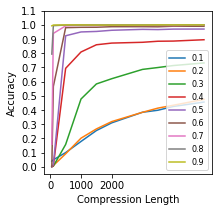

In [18]:
plotaccuracy(thisis)

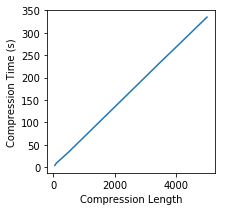

In [19]:
plotcompressiontime(timeforour)

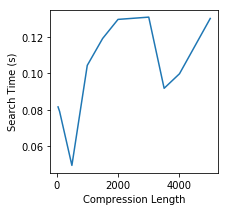

In [20]:
plotsearchtime(search)

In [21]:
s=np.asarray(search)
t=np.asarray(timeforour)

In [22]:
np.save("thisis.npy",thisis)
np.save("search.npy",s)
np.save("compression.npy",t)

In [23]:
print (thisis)

[[4.01878597e-02 4.96523390e-02 1.00377827e-01 1.78886949e-01
  2.55651798e-01 3.10200431e-01 3.84714162e-01 3.98765262e-01
  4.25301695e-01 4.56484156e-01]
 [5.70053596e-03 9.27020625e-03 9.18486632e-02 2.02069462e-01
  2.67122507e-01 3.19015598e-01 3.84426056e-01 4.13745258e-01
  4.33809260e-01 4.75579352e-01]
 [1.57185658e-03 5.04502633e-03 1.57714324e-01 4.77963771e-01
  5.84012733e-01 6.21041217e-01 6.86549236e-01 6.99728230e-01
  7.13718089e-01 7.32036345e-01]
 [1.01942093e-03 7.45238417e-03 6.94140413e-01 8.09303281e-01
  8.60108419e-01 8.71998829e-01 8.77557421e-01 8.84956462e-01
  8.86091174e-01 8.95599460e-01]
 [9.41399926e-04 1.57857380e-02 9.23492482e-01 9.50472675e-01
  9.53978968e-01 9.62247306e-01 9.68648321e-01 9.66982726e-01
  9.70476685e-01 9.70893290e-01]
 [1.23917404e-03 5.66567395e-01 9.80581516e-01 9.83177570e-01
  9.83558325e-01 9.87452406e-01 9.87677397e-01 9.86760125e-01
  9.90913811e-01 9.90394600e-01]
 [1.59039213e-01 9.40290758e-01 9.93250260e-01 9.97923157e